In [6]:
"""
Regression with stock exchange data -- ISTANBUL+STOCK+EXCHANGE 
Data sets includes returns of Istanbul Stock Exchange with seven other international index;
SP, DAX, FTSE, NIKKEI, BOVESPA, MSCE_EU, MSCI_EM from Jun 5, 2009 to Feb 22, 2011.
https://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE
Original 536 rows and 8 attributes with no missing data
"""

'\nRegression with stock exchange data -- ISTANBUL+STOCK+EXCHANGE -- 398 data rows\nData sets includes returns of Istanbul Stock Exchange with seven other international index;\nSP, DAX, FTSE, NIKKEI, BOVESPA, MSCE_EU, MSCI_EM from Jun 5, 2009 to Feb 22, 2011.\nhttps://archive.ics.uci.edu/ml/datasets/ISTANBUL+STOCK+EXCHANGE\nOriginal 536 rows and 8 attributes with no missing data\n'

In [2]:
def read_file_auto(filename):
    line_count = 0
    file_read = open(filename,"r")
    file_write = open("data_stock.csv","w")
    for line in iter(file_read):
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        if "?" in line_split:
            line_count += 1
            print("Bad line number:",line_count)
            continue  
        else:
            line_count += 1
            file_write.write(line)
    file_read.close()
    file_write.close()
    return

In [3]:
read_file_auto("data_akbilgic.csv")

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('data_stock.csv') # deleted 6 rows with ? unknown data
print("Dataframe shape: ",df.shape,"\n") # 392 rows + header
print(df.head())

Dataframe shape:  (536, 10) 

       date  TL_BASED_ISE  US_BASED_ISE        SP       DAX      FTSE  \
0  5-Jan-09      0.035754      0.038376 -0.004679  0.002193  0.003894   
1  6-Jan-09      0.025426      0.031813  0.007787  0.008455  0.012866   
2  7-Jan-09     -0.028862     -0.026353 -0.030469 -0.017833 -0.028735   
3  8-Jan-09     -0.062208     -0.084716  0.003391 -0.011726 -0.000466   
4  9-Jan-09      0.009860      0.009658 -0.021533 -0.019873 -0.012710   

     NIKKEI   BOVESPA        EU        EM  
0  0.000000  0.031190  0.012698  0.028524  
1  0.004162  0.018920  0.011341  0.008773  
2  0.017293 -0.035899 -0.017073 -0.020015  
3 -0.040061  0.028283 -0.005561 -0.019424  
4 -0.004474 -0.009764 -0.010989 -0.007802  


In [11]:
df = df.drop("date",axis=1) #axis = 1 means column, axis = 0 means row
#df = df.drop("TL_BASED_ISE",axis=1)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TL_BASED_ISE,536.0,0.001629,0.016264,-0.062208,-0.006669,0.002189,0.010584,0.068952
US_BASED_ISE,536.0,0.001552,0.021122,-0.084716,-0.009753,0.002643,0.013809,0.100621
SP,536.0,0.000643,0.014093,-0.054262,-0.004675,0.000876,0.006706,0.068366
DAX,536.0,0.000721,0.014557,-0.052331,-0.006212,0.000887,0.008224,0.058951
FTSE,536.0,0.000510,0.012656,-0.054816,-0.005808,0.000409,0.007428,0.050323
NIKKEI,536.0,0.000308,0.014850,-0.050448,-0.007407,0.000000,0.007882,0.061229
BOVESPA,536.0,0.000935,0.015751,-0.053849,-0.007215,0.000279,0.008881,0.063792
EU,536.0,0.000471,0.012990,-0.048817,-0.005952,0.000196,0.007792,0.067042
EM,536.0,0.000936,0.010501,-0.038564,-0.004911,0.001077,0.006423,0.047805


In [12]:
print(df[0:5])

   TL_BASED_ISE  US_BASED_ISE        SP       DAX      FTSE    NIKKEI  \
0      0.035754      0.038376 -0.004679  0.002193  0.003894  0.000000   
1      0.025426      0.031813  0.007787  0.008455  0.012866  0.004162   
2     -0.028862     -0.026353 -0.030469 -0.017833 -0.028735  0.017293   
3     -0.062208     -0.084716  0.003391 -0.011726 -0.000466 -0.040061   
4      0.009860      0.009658 -0.021533 -0.019873 -0.012710 -0.004474   

    BOVESPA        EU        EM  
0  0.031190  0.012698  0.028524  
1  0.018920  0.011341  0.008773  
2 -0.035899 -0.017073 -0.020015  
3  0.028283 -0.005561 -0.019424  
4 -0.009764 -0.010989 -0.007802  


In [13]:
print(df[-5:])

     TL_BASED_ISE  US_BASED_ISE        SP       DAX      FTSE    NIKKEI  \
531      0.008599      0.013400  0.006238  0.001925  0.007952  0.005717   
532      0.009310      0.015977  0.003071 -0.001186  0.000345  0.002620   
533      0.000191     -0.001653  0.001923  0.002872 -0.000723  0.000568   
534     -0.013069     -0.013706 -0.020742 -0.014239 -0.011275  0.001358   
535     -0.007246     -0.019442  0.000000 -0.000473 -0.002997 -0.017920   

      BOVESPA        EU        EM  
531  0.018371  0.006975  0.003039  
532  0.001686 -0.000581  0.001039  
533  0.005628  0.000572  0.006938  
534 -0.011942 -0.012615 -0.000958  
535 -0.012252 -0.005465 -0.014297  


In [15]:
# Normalizing dfpr scale value into 0 to 1
from sklearn import preprocessing
float_array = df.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler() #standard Scaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_normalized = pd.DataFrame(scaled_array,columns = ["TL_BASED_ISE","US_BASED_ISE","SP","DAX","FTSE","NIKKEI","BOVESPA","EU","EM"])
print("Dataframe shape: ",df_normalized.shape,"\n") # 392 rows, 7 columns + header

Dataframe shape:  (536, 9) 



In [16]:
print(df_normalized[0:5])
# print(df_normalized[-5:])

   TL_BASED_ISE  US_BASED_ISE        SP       DAX      FTSE    NIKKEI  \
0      0.746889      0.664154  0.404333  0.489969  0.558409  0.451728   
1      0.668147      0.628741  0.505990  0.546240  0.643736  0.489000   
2      0.254242      0.314902  0.194024  0.310007  0.248066  0.606576   
3      0.000000      0.000000  0.470147  0.364884  0.516936  0.093003   
4      0.549467      0.509203  0.266894  0.291678  0.400483  0.411670   

    BOVESPA        EU        EM  
0  0.722875  0.530944  0.776771  
1  0.618569  0.519229  0.548080  
2  0.152590  0.273987  0.214765  
3  0.698163  0.373348  0.221615  
4  0.374747  0.326501  0.356172  


/Users/qiongyin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3265: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10371ee80>,
      dtype=object)

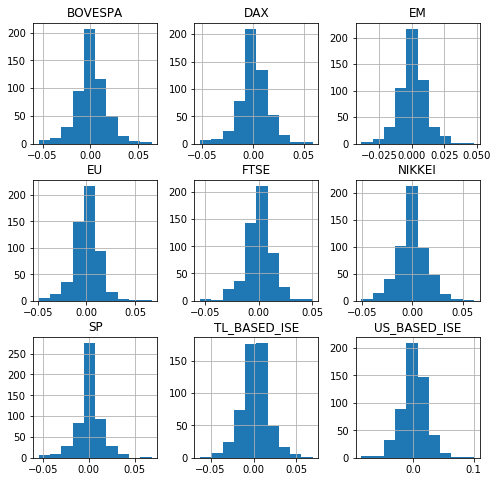

In [17]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df.hist(ax = ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a188e0630>,
      dtype=object)

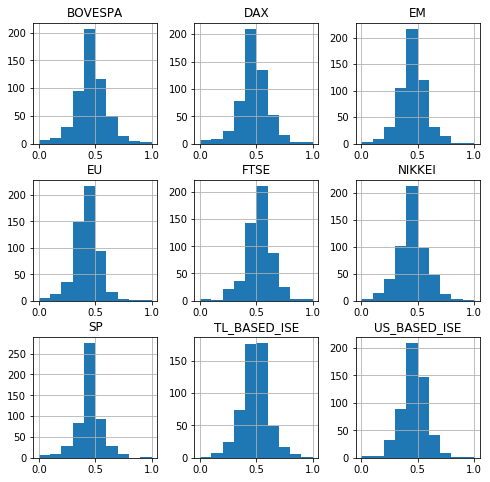

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.gca()
df_normalized.hist(ax = ax)

In [19]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    labels = ["M","TL_BASED_ISE","US_BASED_ISE","SP","DAX","FTSE","NIKKEI","BOVESPA","EU","EM"]
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

In [20]:
df.corr()

,TL_BASED_ISE,US_BASED_ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
TL_BASED_ISE,1.000000,0.942897,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
US_BASED_ISE,0.942897,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
SP,0.439489,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.602081,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.622948,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.260052,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.432898,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.655519,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.600295,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


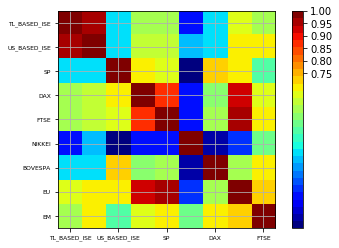

In [21]:
correlation_matrix(df) # original data

In [22]:
df_normalized.corr()

,TL_BASED_ISE,US_BASED_ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
TL_BASED_ISE,1.000000,0.942897,0.439489,0.602081,0.622948,0.260052,0.432898,0.655519,0.600295
US_BASED_ISE,0.942897,1.000000,0.449561,0.629218,0.648740,0.393225,0.446889,0.690761,0.701954
SP,0.439489,0.449561,1.000000,0.685843,0.657673,0.131250,0.722069,0.687550,0.528243
DAX,0.602081,0.629218,0.685843,1.000000,0.867369,0.258538,0.585791,0.936393,0.665162
FTSE,0.622948,0.648740,0.657673,0.867369,1.000000,0.255236,0.596287,0.948963,0.687543
NIKKEI,0.260052,0.393225,0.131250,0.258538,0.255236,1.000000,0.172752,0.283750,0.547288
BOVESPA,0.432898,0.446889,0.722069,0.585791,0.596287,0.172752,1.000000,0.621704,0.688074
EU,0.655519,0.690761,0.687550,0.936393,0.948963,0.283750,0.621704,1.000000,0.716502
EM,0.600295,0.701954,0.528243,0.665162,0.687543,0.547288,0.688074,0.716502,1.000000


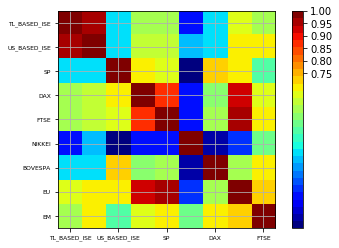

In [23]:
correlation_matrix(df_normalized) # normalized data

In [24]:
X = df_normalized.drop('TL_BASED_ISE',axis=1)
y = df_normalized['TL_BASED_ISE']

In [25]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train shape: ",X_train.shape) # 294 rows, 6 columns
print("y_train shape: ",y_train.shape) # 294 rows, 1 column
print("X_test shape: ",X_test.shape) # 98 rows, 6 columns
print("y_test shape: ",y_test.shape) # 98 rows, 1 column
# print(y_train)

X_train shape:  (402, 8)
y_train shape:  (402,)
X_test shape:  (134, 8)
y_test shape:  (134,)


In [26]:
# Training models in Python dictionary
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [27]:
for regression_model in models_list:
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))

Linear_Regression   0.04076507478334984
Ridge   0.0423357378199359
Lasso   0.11874098024088314
LassoLars   0.11874098024088314
BayesianRidge   0.04064188401890234


In [ ]:
#least regression factor would be the best modeling

In [28]:
# Training model
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

0.009937726368746513
[ 1.11933195 -0.00422212  0.11602283  0.13811935 -0.04776796  0.06872734
 -0.22581775 -0.18483498]
Number of coefficients is  8


In [29]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print(math.sqrt(regression_model_mse))

0.04064188401890234
